# Mass Shooting Analysis 6: Review of Most Dangerous Cities for Mass Shooting Incidents

In [146]:
import json
import pandas as pd
import numpy as np
import math
import wikipedia as wp
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

# Most Dangerous Cities In America (for Mass Shooting Incidents)

In [126]:
mst_df = pd.read_csv('MSA Data\mst14-24_data_big_inc_rem.csv',index_col=0, encoding='utf-8') # Load pre-prepped data
scope = 'USA, 2014-24'

In [127]:
gby_city = mst_df.groupby(['state', 'city']).agg(
    no_ms_inc = pd.NamedAgg(column="killed", aggfunc="count"),
    total_inj = pd.NamedAgg(column="wounded", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="killed", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
).reset_index()


In [128]:
gby_city['wpi'] = gby_city['total_inj'] / gby_city['no_ms_inc']
gby_city['kpi'] = gby_city['total_kld'] / gby_city['no_ms_inc']

In [129]:
city_t20 = gby_city.nlargest(20, 'no_ms_inc').reset_index(drop=True)
city_t20.head(10)

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi
0,PA,Philadelphia,165,679,126,805,4.115152,0.763636
1,IL,Chicago,155,638,120,758,4.116129,0.774194
2,TX,Houston,118,403,151,554,3.415254,1.279661
3,MD,Baltimore,101,425,73,498,4.207921,0.722772
4,DC,Washington,94,408,58,466,4.340426,0.617021
5,LA,New Orleans,90,390,74,464,4.333333,0.822222
6,TN,Memphis,89,360,70,430,4.044944,0.786517
7,MI,Detroit,88,349,81,430,3.965909,0.920455
8,CA,Los Angeles,73,288,59,347,3.945205,0.808219
9,GA,Atlanta,65,275,48,323,4.230769,0.738462


In [130]:
big_ms_cities = gby_city[gby_city['no_ms_inc'] > 30] # Dropping Cities with lower than 30 incidents due to laws of small numbers in wpi/kpi stats
len(big_ms_cities)

31

In [131]:
big_ms_cities.nlargest(10, 'wpi')

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi
1041,MO,Kansas City,42,200,37,237,4.761905,0.880952
1011,MN,Minneapolis,47,216,27,243,4.595745,0.574468
213,CA,Oakland,43,191,21,212,4.441860,0.488372
338,DC,Washington,94,408,58,466,4.340426,0.617021
855,LA,New Orleans,90,390,74,464,4.333333,0.822222
1319,NY,Brooklyn,47,200,27,227,4.255319,0.574468
1374,OH,Cleveland,58,246,52,298,4.241379,0.896552
473,GA,Atlanta,65,275,48,323,4.230769,0.738462
897,MD,Baltimore,101,425,73,498,4.207921,0.722772
1906,WI,Milwaukee,53,219,41,260,4.132075,0.773585


In [132]:
big_ms_cities.nlargest(10, 'kpi')

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi
111,AZ,Phoenix,39,148,59,207,3.794872,1.512821
423,FL,Orlando,36,129,54,183,3.583333,1.500000
1312,NV,Las Vegas,34,121,46,167,3.558824,1.352941
15,AL,Birmingham,35,139,47,186,3.971429,1.342857
1717,TX,Houston,118,403,151,554,3.415254,1.279661
392,FL,Jacksonville,34,123,41,164,3.617647,1.205882
760,IN,Indianapolis,56,215,67,282,3.839286,1.196429
1693,TX,Dallas,54,223,61,284,4.129630,1.129630
241,CA,Sacramento,32,127,35,162,3.968750,1.093750
1759,TX,San Antonio,54,189,57,246,3.500000,1.055556


In [174]:
labels = {'popn_m':'Population of City (M)',
          'population':'Population (City)',
          'area_km2':'Area of the City in Square Kilometers',
          'pop_dens':'Population Density (/km^2)',
          'ms_rate': 'Mass Shooting Incidents per 100k (2014-24)',
          'no_ms_inc': 'Number of Mass Shooting Incidents',
          'total_inj':'Total of People Injured in Mass Shooting Incidents',
          'total_kld':'Total of People Killed in Mass Shooting Incidents',
          'total_inj_kill':'Total Injured or Killed in MS Incidents',
          'kpi':'Avg # Killed per MS Incident',
          'wpi':'Avg # Injured per MS Incident',
          'kld_to_wd':'Proportion of Victims Killed in a MS Incident',
          'suicide_rate':'Rate of Suicide per 100k People',
          'gun_suic_rate':'Rate of Suicide with a Gun per 100k People',
          'prop_suic_w_gun':'Prop Suicides Using a Gun (2021, CDC)',
          'homicide_rate':'Rate of Homicide per 100k People',
          'homicides':'Total Number of Homicide (Victims)',
          'gun_homi_rate':'Rate of Homicide with a Gun per 100k People(2021, CDC)',
          'prop_hom_w_gun':'Prop Homicides Using a Gun (2021, CDC)',
          'gun_death_rate':'Rate of Gunshot Deaths per 100k People (2021, CDC)',
          'gun_deaths':'Total Number of Gun Deaths (2021, CDC)',
          'gun_at_home':'Proportion Households in the State w. a Gun'
          }

In [133]:
#html = wp.page("List of United States cities by population").html().encode("UTF-8")
#pop_df = pd.read_html(html)[2]
#pop_df.head(5)

In [134]:
# pop_df.to_csv('MSA Data\\US_cities_popn_area.csv', encoding='utf-8')

In [135]:
pop_df = pd.read_csv('MSA Data\\US_cities_popn_area.csv',index_col=0, encoding='utf-8',skiprows=1) # Load pre-prepped data
pop_df.head(3)

,City,ST,2024 estimate,2020 census,Change,mi2,km2,/ mi2,/ km2,Location
0,New York[c],NY,8478072,8804190,â3.70%,300.5,778.3,29298,11312,40Â°40â²N 73Â°56â²W﻿ / ﻿40.66Â°N 73.94Â°W
1,Los Angeles,CA,3878704,3898747,â0.51%,469.5,1216.0,8304,3206,34Â°01â²N 118Â°25â²W﻿ / ﻿34.02Â°N 118.41Â°W
2,Chicago,IL,2721308,2746388,â0.91%,227.7,589.7,12061,4657,41Â°50â²N 87Â°41â²W﻿ / ﻿41.84Â°N 87.68Â°W


In [136]:
def clean_text(text):
    # tags like (Mo.,Di. etc)
    text = re.sub(r'\(.*\)', ' ', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    #text = text.lower()
    return text.strip()

In [137]:
pop_df['city'] = pop_df['City'].map(clean_text)
city_t20['city'] = city_t20['city'].map(clean_text)

In [138]:
pop_df = pop_df[['city','ST','2024 estimate', 'km2']]
pop_df.head(3)

,city,ST,2024 estimate,km2
0,New York,NY,8478072,778.3
1,Los Angeles,CA,3878704,1216.0
2,Chicago,IL,2721308,589.7


In [139]:
pop_df = pop_df.rename(columns={
    'ST': 'state',
    '2024 estimate': 'popn_24',
    'km2': 'area_km2',
    })

In [140]:
pop_df['popn_24'] = pop_df['popn_24'].astype(int)
pop_df['area_km2'] = pop_df['area_km2'].astype(float)

In [141]:
ms_city = city_t20.merge(pop_df, 
                 left_on=['state','city'],
                 right_on=['state', 'city'],
                 how='left')      # left join instead of inner to keep any territory w/o data
ms_city.head(5)

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi,popn_24,area_km2
0,PA,Philadelphia,165,679,126,805,4.115152,0.763636,1573916.0,348.1
1,IL,Chicago,155,638,120,758,4.116129,0.774194,2721308.0,589.7
2,TX,Houston,118,403,151,554,3.415254,1.279661,2390125.0,1658.6
3,MD,Baltimore,101,425,73,498,4.207921,0.722772,568271.0,209.5
4,DC,Washington,94,408,58,466,4.340426,0.617021,702250.0,158.2


In [142]:
ms_city.drop(index=18).reset_index(drop=True) # No seperate popn stat for brooklyn so dropping brooklyn from data frame


,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi,popn_24,area_km2
0,PA,Philadelphia,165,679,126,805,4.115152,0.763636,1573916.0,348.1
1,IL,Chicago,155,638,120,758,4.116129,0.774194,2721308.0,589.7
2,TX,Houston,118,403,151,554,3.415254,1.279661,2390125.0,1658.6
3,MD,Baltimore,101,425,73,498,4.207921,0.722772,568271.0,209.5
4,DC,Washington,94,408,58,466,4.340426,0.617021,702250.0,158.2
5,LA,New Orleans,90,390,74,464,4.333333,0.822222,362701.0,439.0
6,TN,Memphis,89,360,70,430,4.044944,0.786517,610919.0,769.2
7,MI,Detroit,88,349,81,430,3.965909,0.920455,645705.0,359.2
8,CA,Los Angeles,73,288,59,347,3.945205,0.808219,3878704.0,1216.0
9,GA,Atlanta,65,275,48,323,4.230769,0.738462,520070.0,350.4


In [143]:
ms_city.columns

Index(['state', 'city', 'no_ms_inc', 'total_inj', 'total_kld',
       'total_inj_kill', 'wpi', 'kpi', 'popn_24', 'area_km2'],
      dtype='object')

In [149]:
ms_city['ms_rate'] = 100000 * ms_city['no_ms_inc'] / ms_city['popn_24']
ms_city['pop_dens'] = ms_city['popn_24'] / ms_city['area_km2']
ms_city['popn_m'] = ms_city['popn_24']/ 1000000
ms_city.nlargest(10, 'ms_rate')

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi,popn_24,area_km2,ms_rate,pop_dens,popn_m
5,LA,New Orleans,90,390,74,464,4.333333,0.822222,362701.0,439.0,24.813827,826.198178,0.362701
10,MO,St. Louis,65,239,62,301,3.676923,0.953846,279695.0,159.8,23.239600,1750.281602,0.279695
3,MD,Baltimore,101,425,73,498,4.207921,0.722772,568271.0,209.5,17.773210,2712.510740,0.568271
11,OH,Cleveland,58,246,52,298,4.241379,0.896552,365379.0,201.2,15.873928,1815.999006,0.365379
6,TN,Memphis,89,360,70,430,4.044944,0.786517,610919.0,769.2,14.568216,794.226469,0.610919
7,MI,Detroit,88,349,81,430,3.965909,0.920455,645705.0,359.2,13.628515,1797.619710,0.645705
4,DC,Washington,94,408,58,466,4.340426,0.617021,702250.0,158.2,13.385546,4439.001264,0.702250
9,GA,Atlanta,65,275,48,323,4.230769,0.738462,520070.0,350.4,12.498318,1484.218037,0.520070
17,MN,Minneapolis,47,216,27,243,4.595745,0.574468,428579.0,139.9,10.966473,3063.466762,0.428579
16,FL,Miami,52,213,38,251,4.096154,0.730769,487014.0,93.2,10.677311,5225.472103,0.487014


In [160]:
gun_sts = pd.read_csv('MSA Data\\us_gun_data_by_state.csv',index_col=0, encoding='utf-8') # Load pre-prepped data

In [161]:
gun_sts.head(3)

,state,no_ms_inc,Homicide rate,Gun homicide rate,Homicide,prop_hom_w_gun,Suicide rate,Gun suicide rate,Suicide,prop_suic_w_gun,Gun deaths,gun_death_rate,gun_at_home
0,AK,9,6.7,4.2,31.0,0.626866,30.0,19.4,142.0,0.646667,182.0,24.816230,0.57
1,AL,176,14.8,12.9,650.0,0.871622,16.4,12.4,623.0,0.756098,1315.0,26.172910,0.53
2,AR,70,11.1,9.3,281.0,0.837838,20.4,12.9,391.0,0.632353,698.0,23.177634,0.52


In [163]:
gun_sts = gun_sts.rename(columns={
    'no_ms_inc': 'sts_ms_tot',
    'Suicide rate':'suicide_rate',
    'Gun suicide rate':'gun_suic_rate',
    'Homicide rate':'homicide_rate',
    'Homicide':'homicides',
    'Suicide':'suicides',
    'Gun homicide rate':'gun_homi_rate',
    'Gun deaths':'gun_deaths'
    })

In [164]:
city_df = ms_city.merge(gun_sts, 
                 left_on='state',
                 right_on='state',
                 how='left')      # left join instead of inner to keep any territory w/o data
city_df.head(5)

,state,city,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,kpi,popn_24,area_km2,...,gun_homi_rate,homicides,prop_hom_w_gun,suicide_rate,gun_suic_rate,suicides,prop_suic_w_gun,gun_deaths,gun_death_rate,gun_at_home
0,PA,Philadelphia,165,679,126,805,4.115152,0.763636,1573916.0,348.1,...,6.6,861.0,0.776471,14.5,7.7,997.0,0.531034,1905.0,14.650803,0.40
1,IL,Chicago,155,638,120,758,4.116129,0.774194,2721308.0,589.7,...,10.2,1292.0,0.871795,11.5,5.2,656.0,0.452174,1995.0,15.570722,0.23
2,TX,Houston,118,403,151,554,3.415254,1.279661,2390125.0,1658.6,...,6.6,1942.0,0.814815,14.2,8.6,2528.0,0.605634,4613.0,15.827484,0.36
3,MD,Baltimore,101,425,73,498,4.207921,0.722772,568271.0,209.5,...,9.6,592.0,0.834783,10.1,5.0,310.0,0.495050,915.0,14.812479,0.17
4,DC,Washington,94,408,58,466,4.340426,0.617021,702250.0,158.2,...,25.2,169.0,0.756757,6.9,1.8,12.0,0.260870,185.0,27.247074,NaN


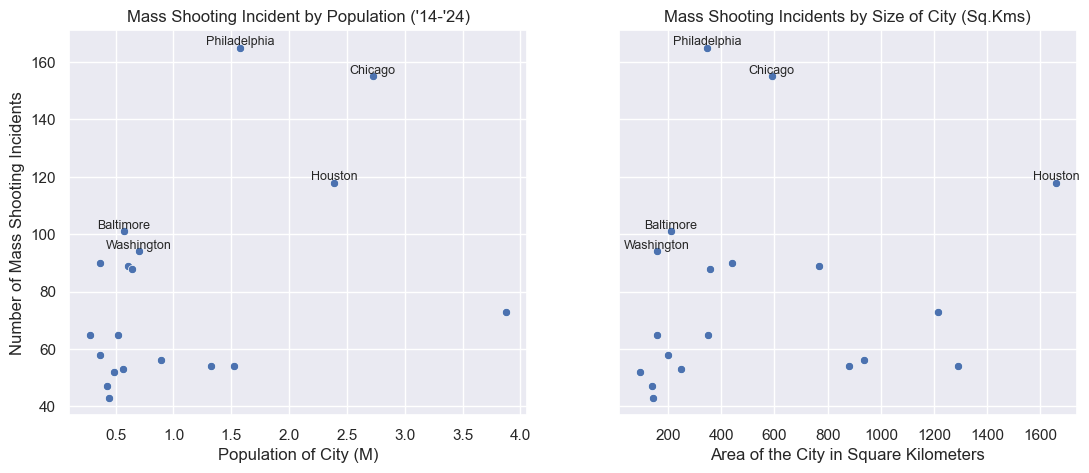

In [186]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
x1_var, y1_var = 'popn_m', 'no_ms_inc'
x2_var, y2_var  = 'area_km2', 'no_ms_inc'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Population (\'14-\'24)')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incidents by Size of City (Sq.Kms)')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(5, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

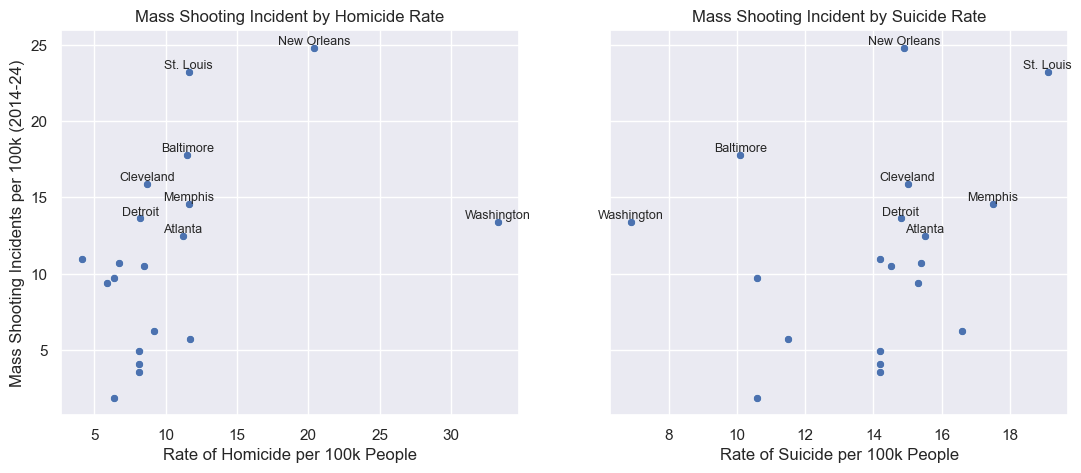

In [183]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
x1_var, y1_var = 'homicide_rate', 'ms_rate'
x2_var, y2_var  = 'suicide_rate', 'ms_rate'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Homicide Rate')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Suicide Rate')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "ms_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

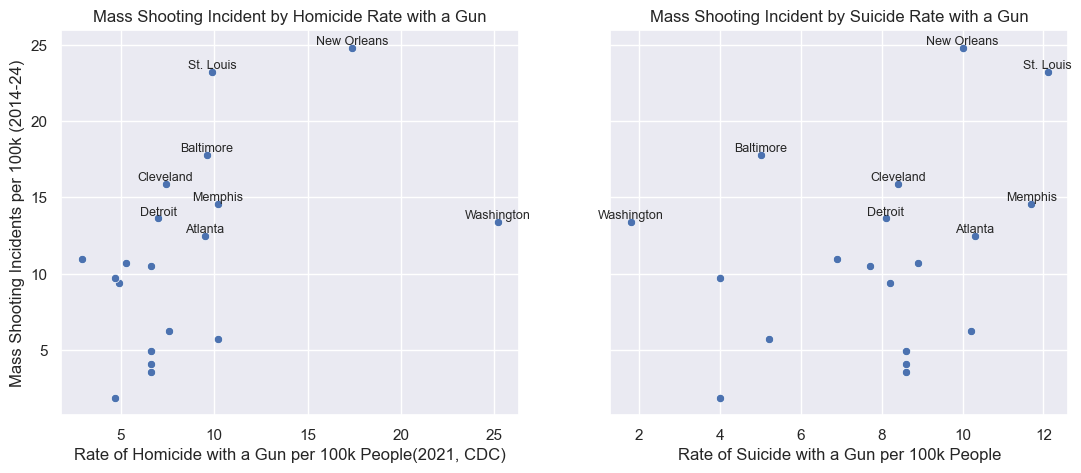

In [184]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
x1_var, y1_var = 'gun_homi_rate', 'ms_rate'
x2_var, y2_var  = 'gun_suic_rate', 'ms_rate'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Homicide Rate with a Gun')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Suicide Rate with a Gun')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "ms_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

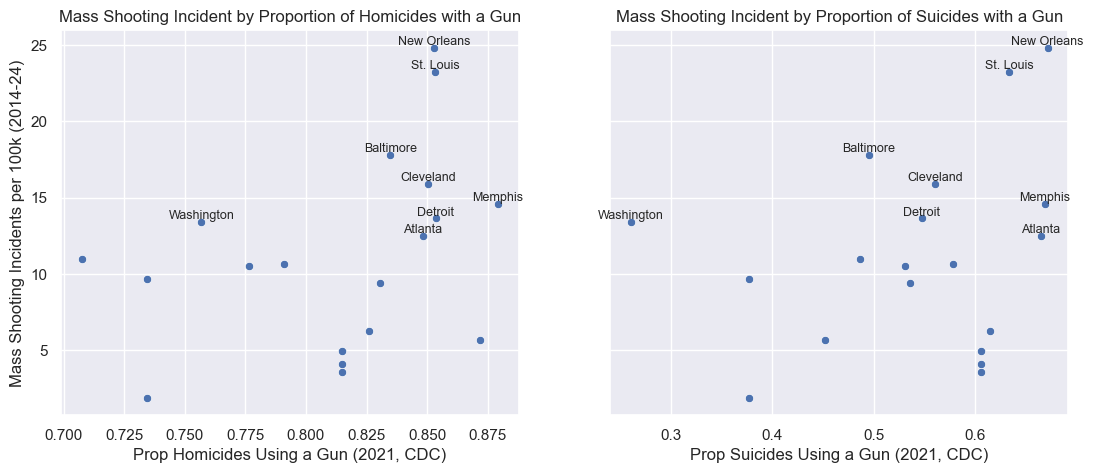

In [185]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
x1_var, y1_var = 'prop_hom_w_gun', 'ms_rate'
x2_var, y2_var  = 'prop_suic_w_gun', 'ms_rate'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Proportion of Homicides with a Gun')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Proportion of Suicides with a Gun')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "ms_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

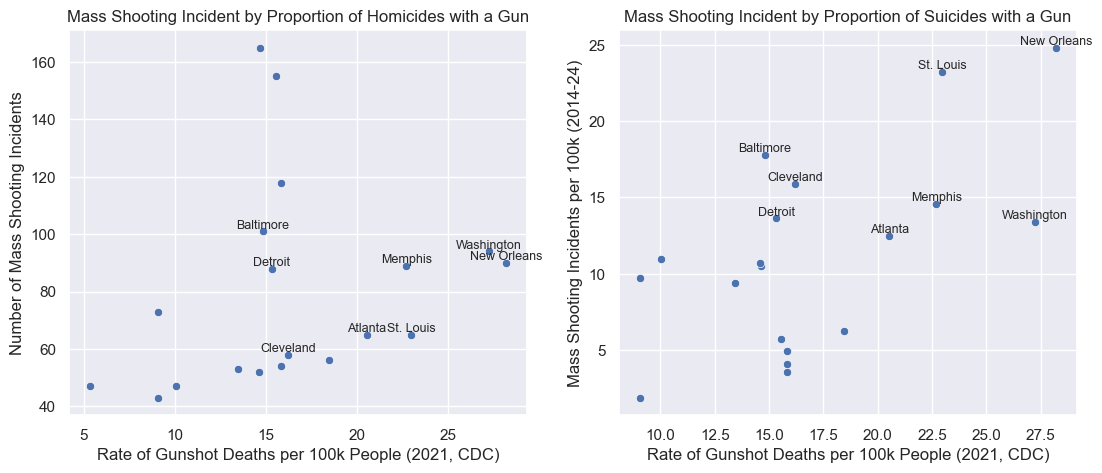

In [189]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)
x1_var, y1_var = 'gun_death_rate', 'no_ms_inc'
x2_var, y2_var  = 'gun_death_rate', 'ms_rate'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Proportion of Homicides with a Gun')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Proportion of Suicides with a Gun')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "ms_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

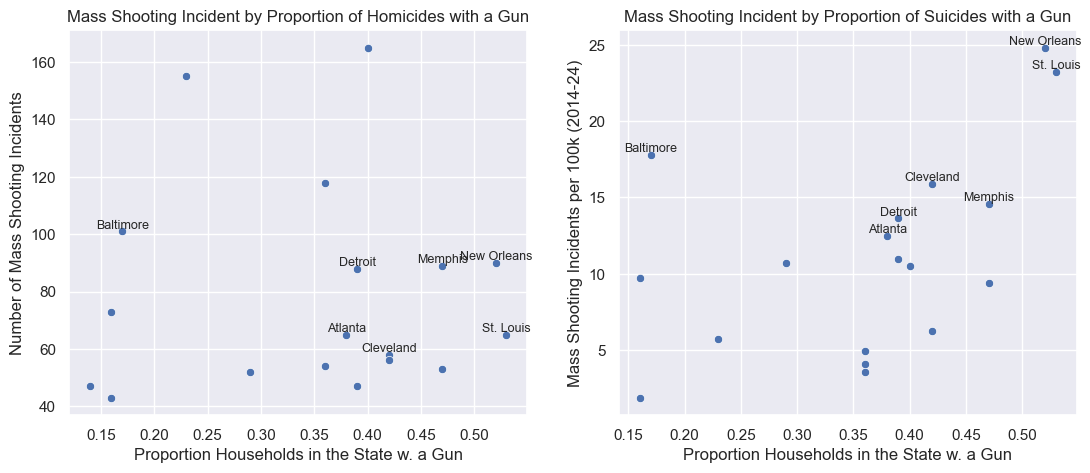

In [190]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)
x1_var, y1_var = 'gun_at_home', 'no_ms_inc'
x2_var, y2_var  = 'gun_at_home', 'ms_rate'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Proportion of Homicides with a Gun')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Proportion of Suicides with a Gun')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "ms_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")

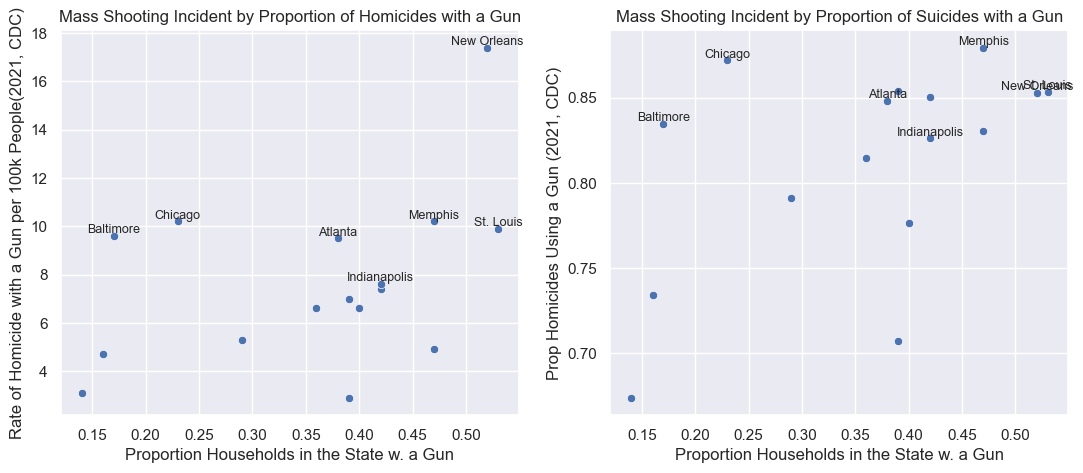

In [191]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)
x1_var, y1_var = 'gun_at_home', 'gun_homi_rate'
x2_var, y2_var  = 'gun_at_home', 'prop_hom_w_gun'
sns.scatterplot(x= x1_var, y=y1_var, data=city_df, ax=ax1).set_title('Mass Shooting Incident by Proportion of Homicides with a Gun')
ax1.set(xlabel=labels[x1_var], ylabel=labels[y1_var])
sns.scatterplot(x=x2_var, y=y2_var, data=city_df, ax=ax2).set_title('Mass Shooting Incident by Proportion of Suicides with a Gun')
ax2.set(xlabel=labels[x2_var], ylabel=labels[y2_var])

highlight = city_df.nlargest(8, "gun_homi_rate")
for _, row in highlight.iterrows():
    ax1.text(row[x1_var], row[y1_var], row['city'], fontsize=9, ha="center", va="bottom")
    ax2.text(row[x2_var], row[y2_var], row['city'], fontsize=9, ha="center", va="bottom")